Dataset Overview:
Total tax delinquent properties: 27141

Columns: ['_id', 'pin', 'address', 'billing_city', 'current_delq_tax', 'current_delq_pi', 'prior_years', 'prior_delq_tax', 'prior_delq_pi', 'state_description', 'neighborhood', 'council_district', 'ward', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone', 'longitude', 'latitude']

First few rows:
       _id               pin             address    billing_city  \
0  1897699  0032E00294000000             HORN ST  PITTSBURGH, PA   
1  1897700  0033C00201000000  501 BROWNSVILLE RD   ROCKVILLE, MD   
2  1897701  0008D00020000002       412 E COMMONS  PITTSBURGH, PA   
3  1897702  0008C00155000400      1 ALLEGHENY SQ  PITTSBURGH, PA   
4  1897703  0008D00020000001       412 E COMMONS  PITTSBURGH, PA   

   current_delq_tax  current_delq_pi  prior_years  prior_delq_tax  \
0             55.35              0.0            0             0.0   
1             24.27              0.0            0             0.0   
2         

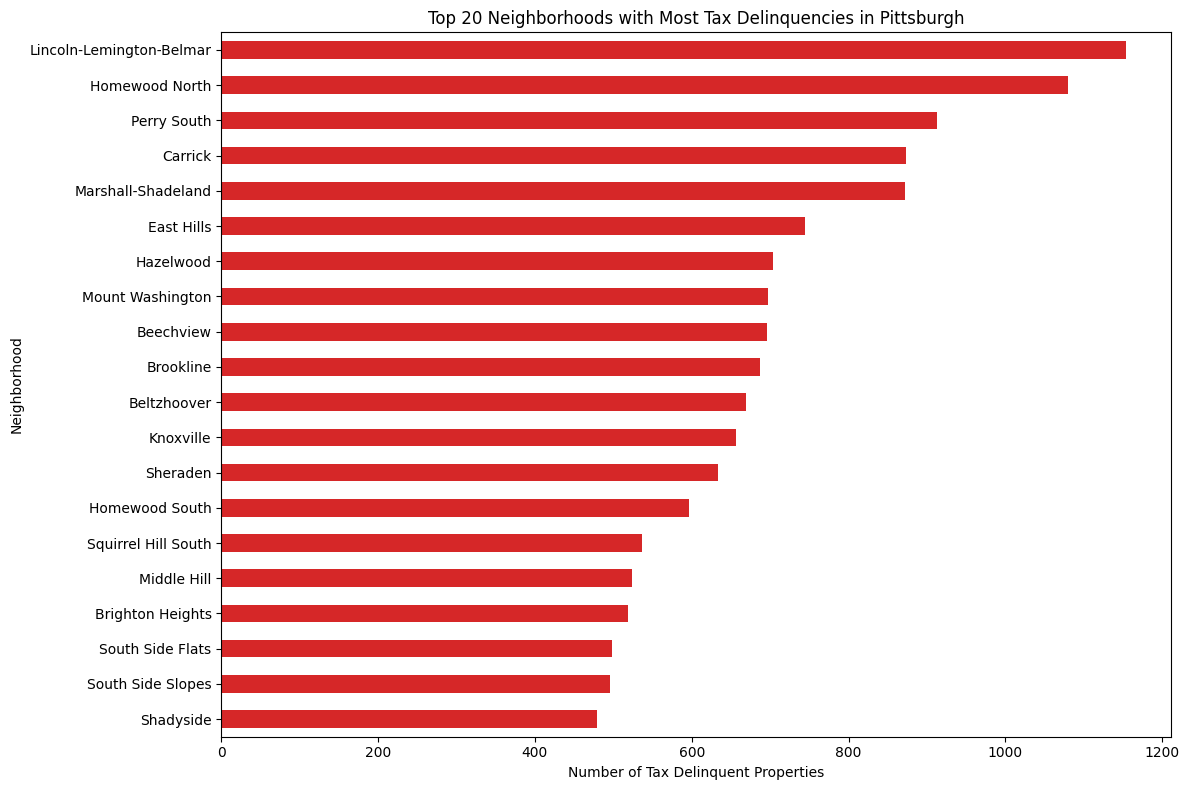

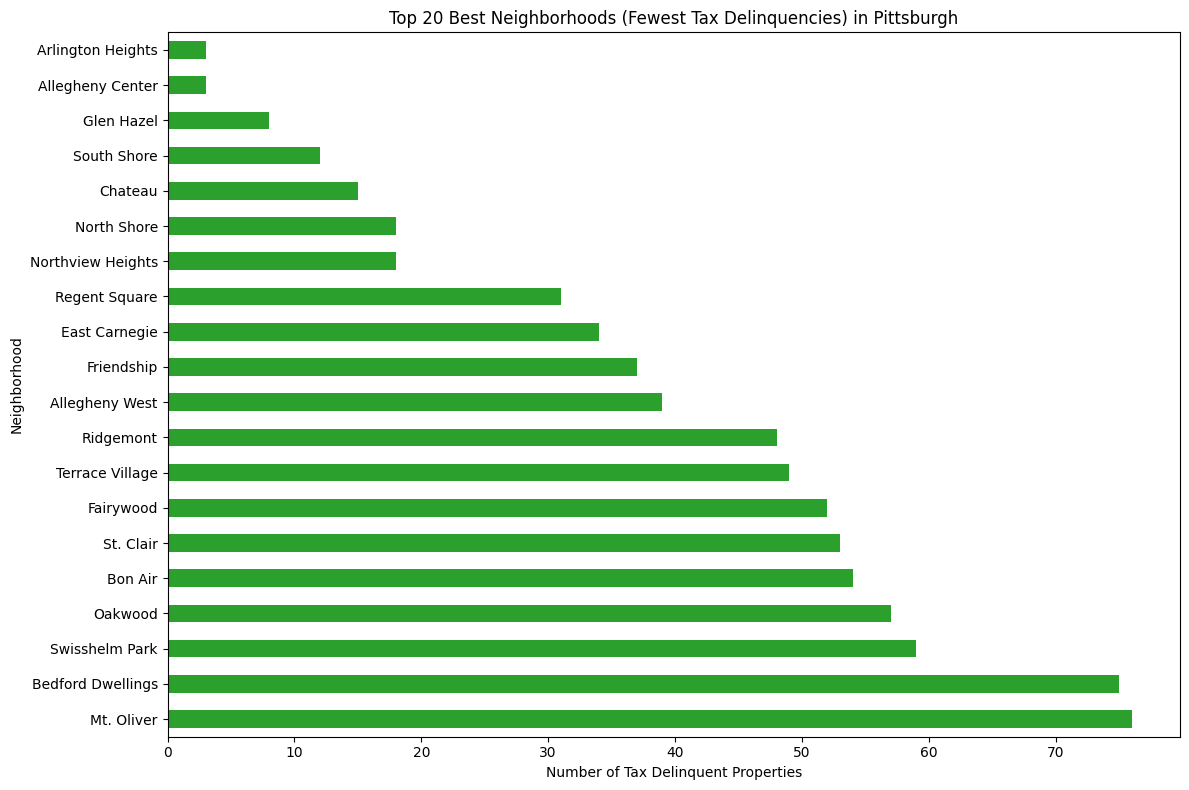

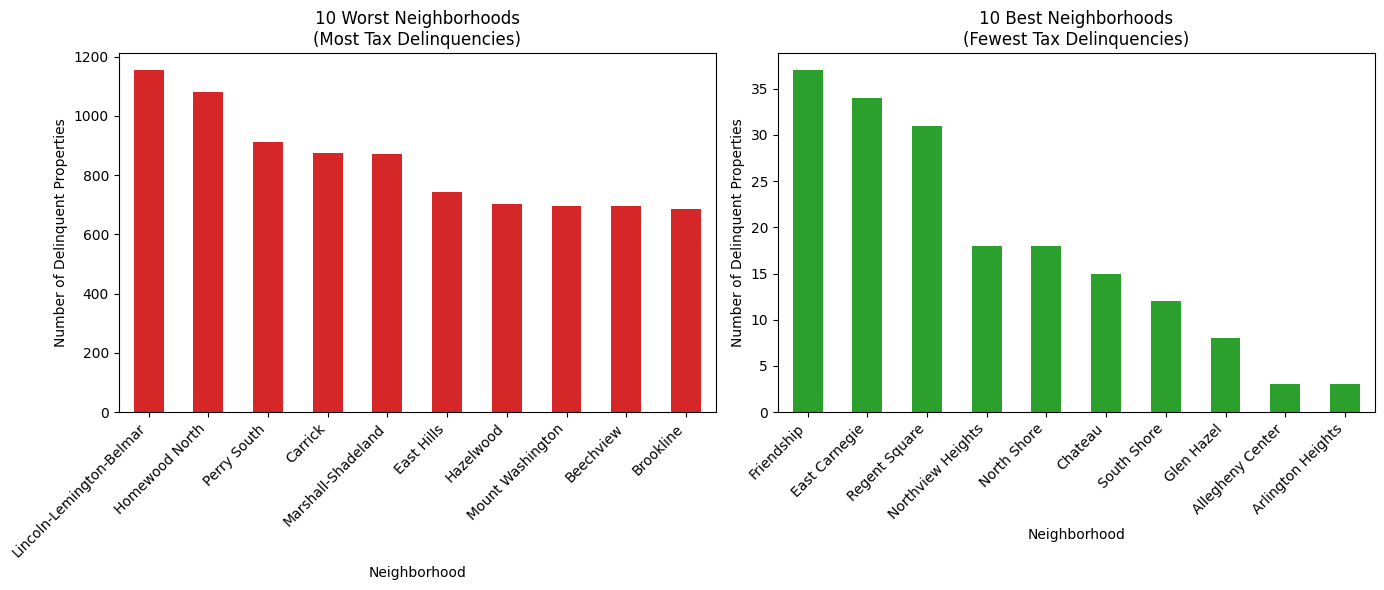


Properties with coordinates for mapping: 26702


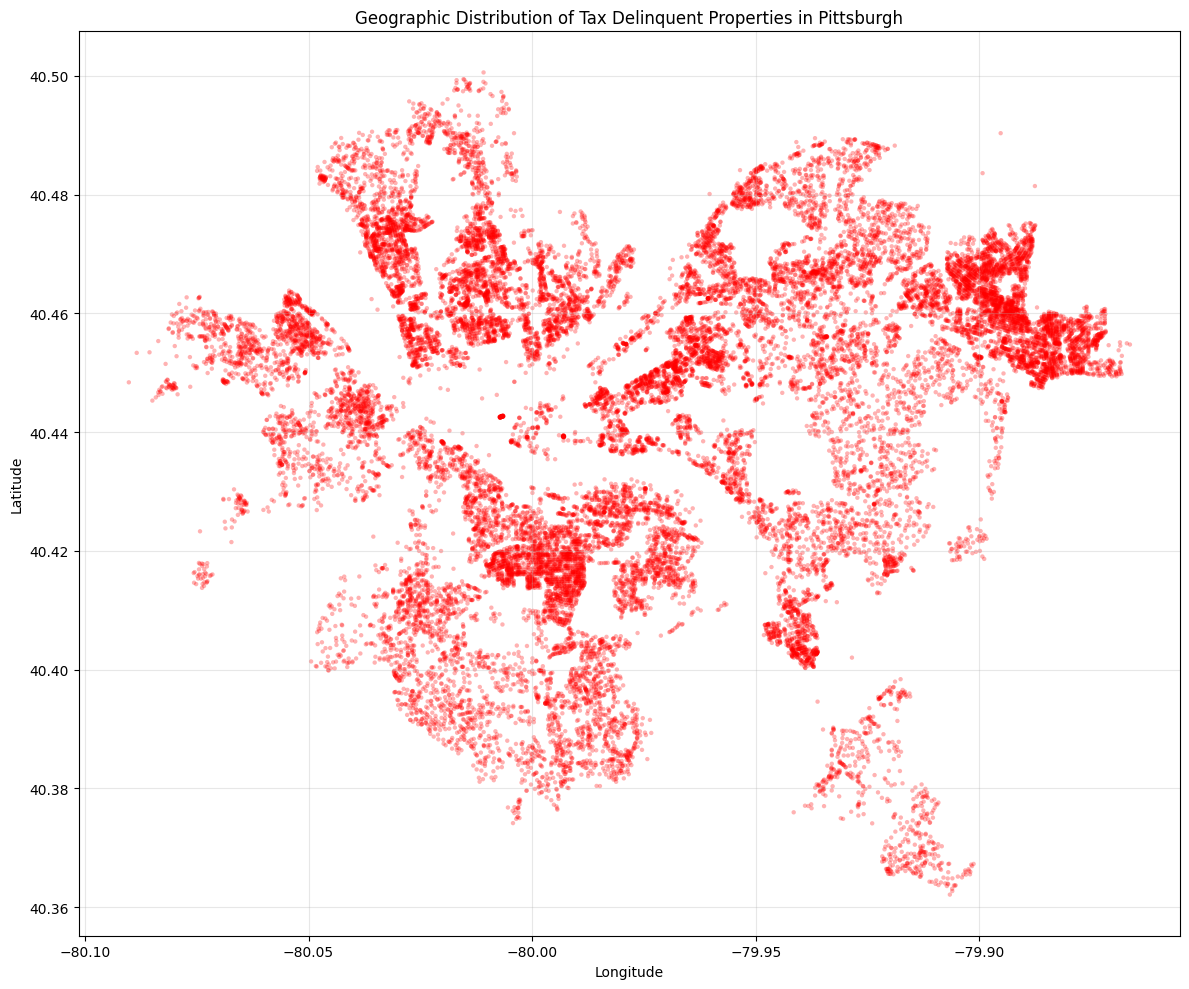

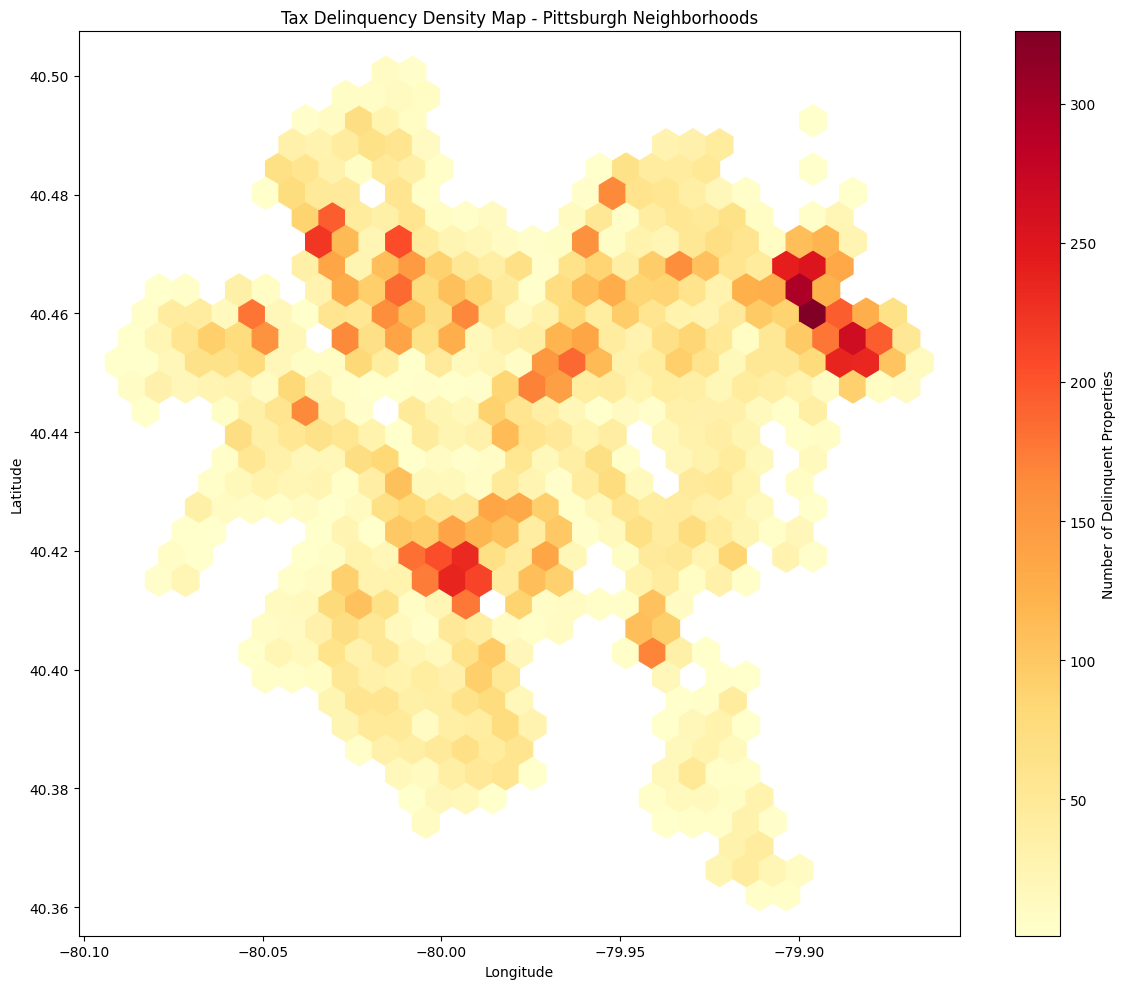


WORST NEIGHBORHOODS (Most Tax Delinquencies)
Lincoln-Lemington-Belmar: 1154 delinquent properties
Homewood North: 1080 delinquent properties
Perry South: 913 delinquent properties
Carrick: 873 delinquent properties
Marshall-Shadeland: 872 delinquent properties
East Hills: 744 delinquent properties
Hazelwood: 704 delinquent properties
Mount Washington: 697 delinquent properties
Beechview: 696 delinquent properties
Brookline: 687 delinquent properties


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('taxdel.tsv', 
                 sep='\t', encoding='utf-8-sig')

print("Dataset Overview:")
print(f"Total tax delinquent properties: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# remove useless data/no data
df_with_neighborhood = df[df['neighborhood'].notna() & (df['neighborhood'] != '')]

print(f"\nProperties with neighborhood data: {len(df_with_neighborhood)}")

# sort by neighborhood
delinquency_by_neighborhood = df_with_neighborhood['neighborhood'].value_counts()

print("\n" + "="*60)
print("TAX DELINQUENCY COUNTS BY NEIGHBORHOOD")
print("="*60)
print(delinquency_by_neighborhood.head(20))

# graphs
print("\n" + "="*60)
print("BEST NEIGHBORHOODS (Fewest Tax Delinquencies)")
print("="*60)
print(delinquency_by_neighborhood.tail(20))

print("\n" + "="*60)
print("STATISTICS")
print("="*60)
print(f"Total unique neighborhoods: {df_with_neighborhood['neighborhood'].nunique()}")
print(f"Average delinquencies per neighborhood: {delinquency_by_neighborhood.mean():.2f}")
print(f"Median delinquencies per neighborhood: {delinquency_by_neighborhood.median():.2f}")

best_neighborhood = delinquency_by_neighborhood.idxmin()
best_neighborhood_count = delinquency_by_neighborhood.min()

print("\n" + "="*60)
print("CONCLUSION")
print("="*60)
print(f"Best neighborhood (fewest delinquencies): {best_neighborhood}")
print(f"Number of delinquent properties: {best_neighborhood_count}")

plt.figure(figsize=(12, 8))
delinquency_by_neighborhood.head(20).plot(kind='barh', color='#d62728')
plt.xlabel('Number of Tax Delinquent Properties')
plt.ylabel('Neighborhood')
plt.title('Top 20 Neighborhoods with Most Tax Delinquencies in Pittsburgh')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
delinquency_by_neighborhood.tail(20).plot(kind='barh', color='#2ca02c')
plt.xlabel('Number of Tax Delinquent Properties')
plt.ylabel('Neighborhood')
plt.title('Top 20 Best Neighborhoods (Fewest Tax Delinquencies) in Pittsburgh')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
delinquency_by_neighborhood.head(10).plot(kind='bar', color='#d62728')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Delinquent Properties')
plt.title('10 Worst Neighborhoods\n(Most Tax Delinquencies)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
delinquency_by_neighborhood.tail(10).plot(kind='bar', color='#2ca02c')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Delinquent Properties')
plt.title('10 Best Neighborhoods\n(Fewest Tax Delinquencies)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

df_map = df_with_neighborhood[(df_with_neighborhood['longitude'].notna()) & 
                               (df_with_neighborhood['latitude'].notna())]

print(f"\nProperties with coordinates for mapping: {len(df_map)}")

plt.figure(figsize=(12, 10))
plt.scatter(df_map['longitude'], df_map['latitude'], 
           c='red', alpha=0.3, s=10, edgecolors='none')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Tax Delinquent Properties in Pittsburgh')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# heat map
plt.figure(figsize=(12, 10))
plt.hexbin(df_map['longitude'], df_map['latitude'], 
          gridsize=30, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Number of Delinquent Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tax Delinquency Density Map - Pittsburgh Neighborhoods')
plt.tight_layout()
plt.show()

# summary
print("\n" + "="*60)
print("WORST NEIGHBORHOODS (Most Tax Delinquencies)")
print("="*60)
worst_10 = delinquency_by_neighborhood.head(10)
for neighborhood, count in worst_10.items():
    print(f"{neighborhood}: {count} delinquent properties")

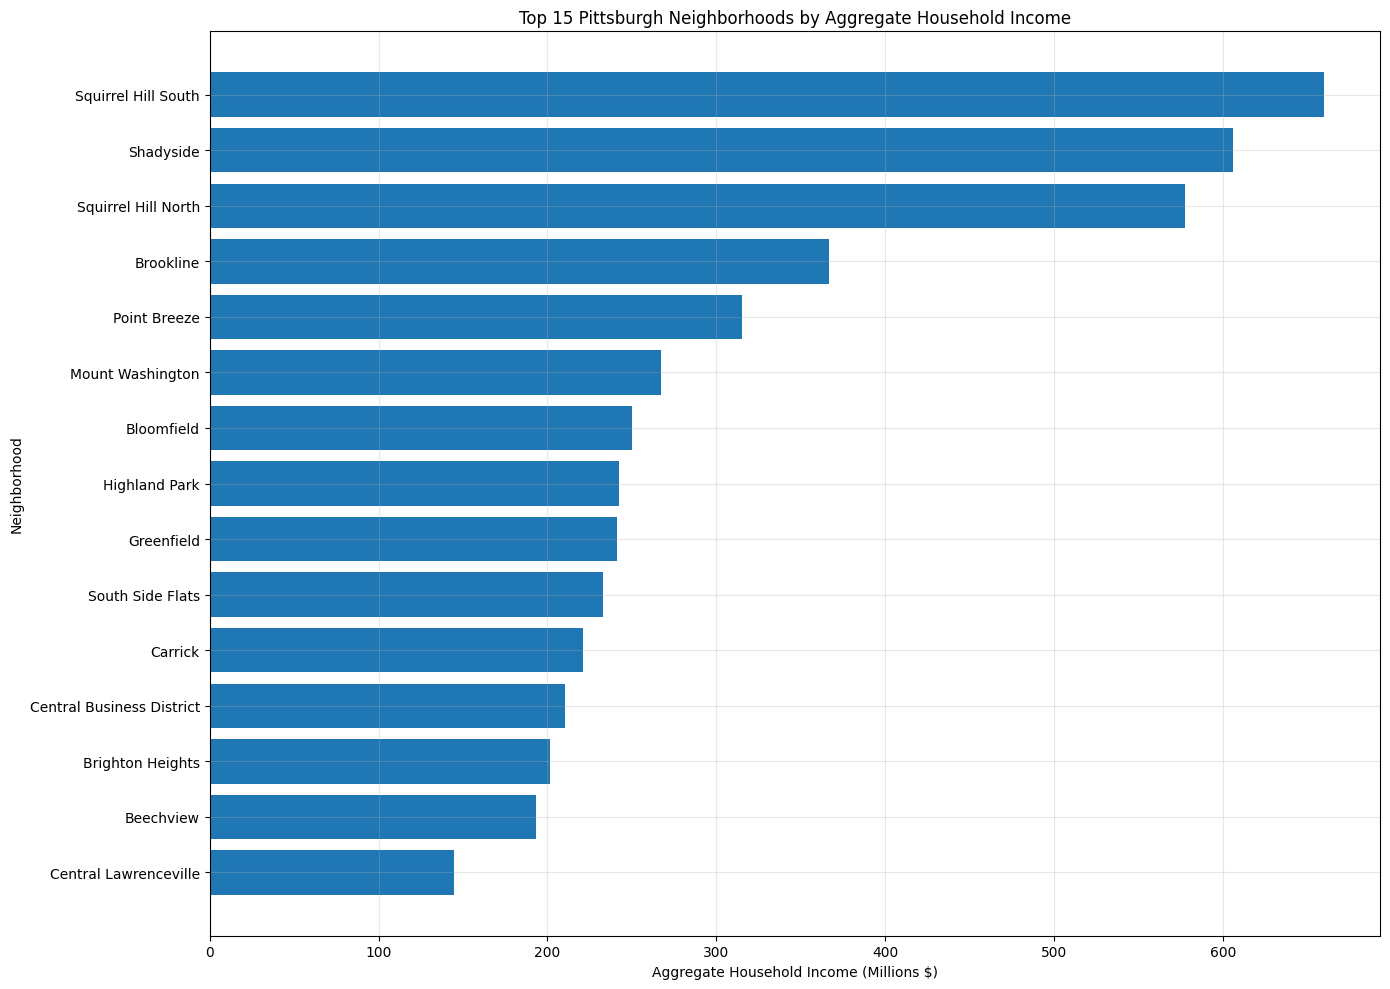


Top 15 Neighborhoods:
                 Neighborhood     Income
77        Squirrel Hill South  659886300
68                  Shadyside  605635700
76        Squirrel Hill North  577467500
13                  Brookline  366945900
63               Point Breeze  314958500
53           Mount Washington  267100700
9                  Bloomfield  249898900
39              Highland Park  242405400
36                 Greenfield  241377900
72           South Side Flats  233098400
15                    Carrick  221221100
16  Central Business District  210460000
12           Brighton Heights  201692800
7                   Beechview  193055900
17      Central Lawrenceville  144917900


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv')

# Clean column names
df.columns = ['Neighborhood', 'Id', 'Income', 'Margin_of_Error']

# Remove rows with missing income data
df = df[df['Income'] != '-']

# Converts income to a numeric value
df['Income'] = pd.to_numeric(df['Income'])

# Sorts by income and gets the top 15
df_sorted = df.sort_values('Income', ascending=False).head(15)

# This is the code for the bargraph 
plt.figure(figsize=(14, 10))
plt.barh(df_sorted['Neighborhood'], df_sorted['Income'] / 1_000_000)
plt.xlabel('Aggregate Household Income (Millions $)')
plt.ylabel('Neighborhood')
plt.title('Top 15 Pittsburgh Neighborhoods by Aggregate Household Income')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Prints ranking
print("\nTop 15 Neighborhoods:")
print(df_sorted[['Neighborhood', 'Income']])

 Step 1: Imports and setup

In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Step 2: Load and clean poverty data

In [8]:
df = pd.read_csv("Education_income_2010.csv")

df = df[['Neighborhood', "Est. Percent Under Poverty (2010)"]]

df = df.rename(columns={'Neighborhood': "neighborhood", "Est. Percent Under Poverty (2010)": "pct_under_poverty"})
df.columns
print(df.head(10))

        neighborhood pct_under_poverty
0   Allegheny Center             34.0%
1     Allegheny West              5.0%
2          Allentown             28.5%
3          Arlington             20.3%
4  Arlington Heights             57.7%
5         Banksville              5.8%
6  Bedford Dwellings             49.0%
7          Beechview             18.3%
8        Beltzhoover             23.5%
9         Bloomfield             19.4%


Step 3: Clean Poverty Percentage Column

In [9]:
# Clean the poverty percentage data
df['pct_under_poverty'] = (
    df['pct_under_poverty']
    .astype(str)
    .str.replace('[%,]', '', regex=True)
    .str.strip()
)
df['pct_under_poverty'] = pd.to_numeric(df['pct_under_poverty'], errors='coerce')
df = df.dropna(subset=['pct_under_poverty'])

print(df['pct_under_poverty'])

0     34.0
1      5.0
2     28.5
3     20.3
4     57.7
      ... 
85    25.7
86     0.0
87    46.6
88     5.8
89     5.4
Name: pct_under_poverty, Length: 90, dtype: float64


Step 4: Calculate Summary Statistics (Average Poverty Rate)

In [10]:
# Calculate average poverty rate
avg_poverty = df['pct_under_poverty'].mean()
print(f"Average Poverty Rate: {avg_poverty:.2f}%")

Average Poverty Rate: 25.09%


Step 5: Identify Neighborhoods with Highest Poverty Rates

In [11]:
#Sort by highest poverty rate (descending)
highest_poverty = df.sort_values(by="pct_under_poverty", ascending=False)
highest_poverty.head(10)

,neighborhood,pct_under_poverty
21,Chateau,100.0
10,Bluff,80.2
19,Central Oakland,64.8
14,California-Kirkbride,62.7
30,Esplen,60.7
57,Northview Heights,58.1
4,Arlington Heights,57.7
40,Homewood North,55.7
6,Bedford Dwellings,49.0
23,Crawford-Roberts,48.2


Step 6: Visualize Top 10 Neighborhoods by Poverty Rate

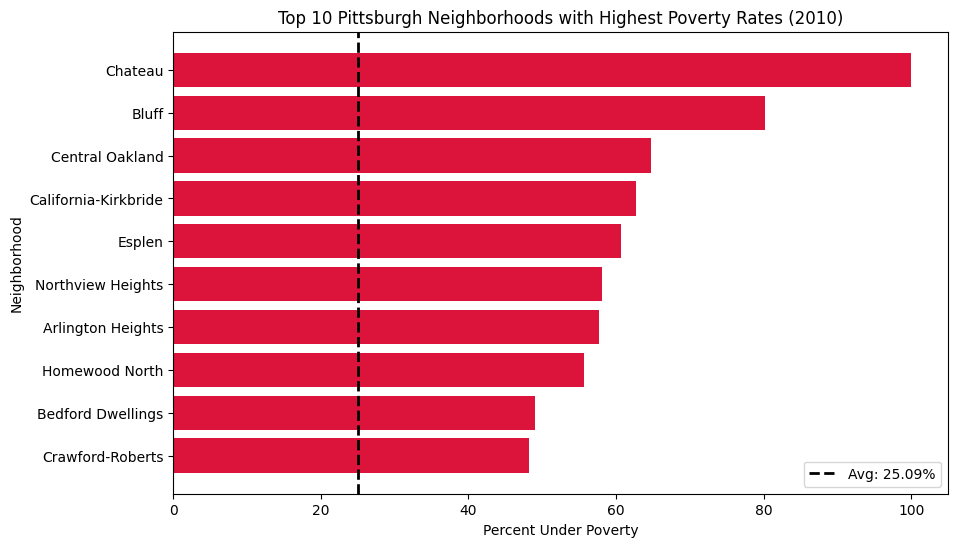

In [12]:
# Visualize top 10 neighborhoods with highest poverty rates
top10 = highest_poverty.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10['neighborhood'], top10['pct_under_poverty'], color='crimson')
plt.axvline(x=avg_poverty, color='black', linestyle='--', linewidth=2, label=f'Avg: {avg_poverty:.2f}%')
plt.xlabel("Percent Under Poverty", color='black')
plt.ylabel("Neighborhood", color='black')
plt.title("Top 10 Pittsburgh Neighborhoods with Highest Poverty Rates (2010)", color='black')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

Step 7: Identify Neighborhoods with Lowest Poverty Rates

In [13]:
# Sort by lowest poverty rate (ascending)
lowest_poverty = df.sort_values(by="pct_under_poverty", ascending=True)
lowest_poverty.head(10)

,neighborhood,pct_under_poverty
86,West End,0.0
56,North Shore,0.0
70,South Shore,0.0
65,Regent Square,1.1
81,Swisshelm Park,2.1
79,Strip District,2.1
45,Lincoln Place,3.6
78,Stanton Heights,4.2
62,Point Breeze,4.6
1,Allegheny West,5.0


Step 8: Visualize top 10 neighborhoods with lowest poverty rates

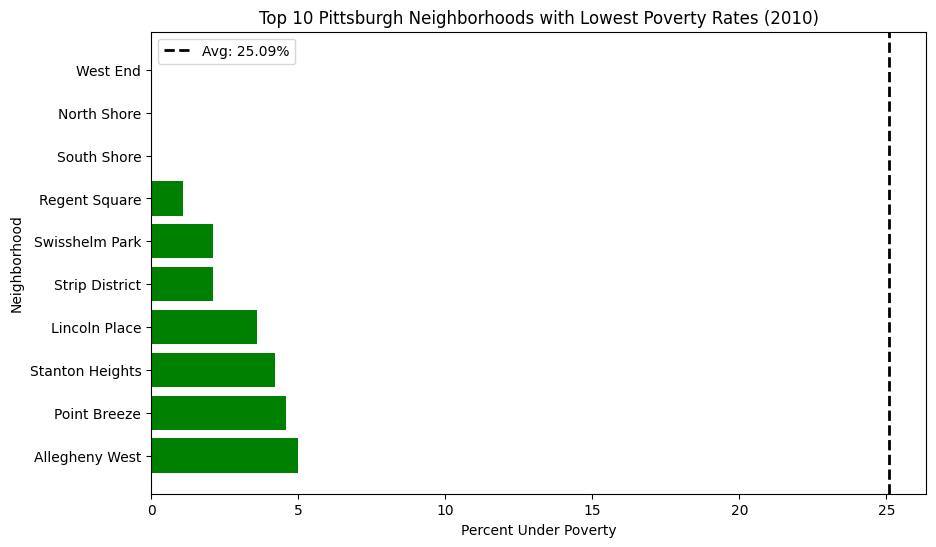

In [14]:
# Visualize top 10 neighborhoods with lowest poverty rates
bottom10 = lowest_poverty.head(10)
plt.figure(figsize=(10,6))
plt.barh(bottom10['neighborhood'], bottom10['pct_under_poverty'], color='green')
plt.axvline(x=avg_poverty, color='black', linestyle='--', linewidth=2, label=f'Avg: {avg_poverty:.2f}%')
plt.xlabel("Percent Under Poverty", color='black')
plt.ylabel("Neighborhood", color='black')
plt.title("Top 10 Pittsburgh Neighborhoods with Lowest Poverty Rates (2010)", color='black')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

Step 9:(Geospatial Data) Load and Explore Neighborhood Shapefile

Index(['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i', 'hood',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len',
       'geometry'],
      dtype='object')

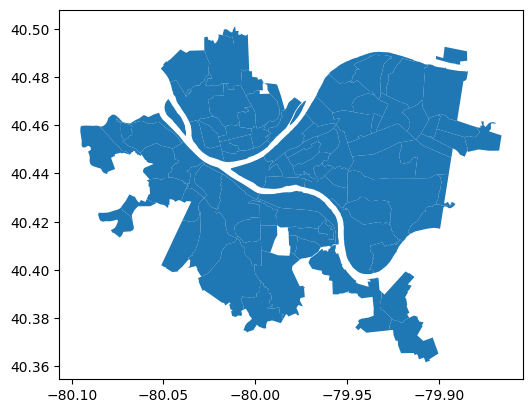

In [15]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

neighborhoods.columns

Step 10: Merge Poverty Data with Neighborhood GeodataFrame 

In [16]:
# Merge with neighborhoods geodataframe
merged = neighborhoods.merge(df, left_on='hood', right_on='neighborhood', how='left')
df['neighborhood'] = df['neighborhood'].replace({
    'Mt. Washington': 'Mount Washington',
    'S. Side Flats': 'South Side Flats',
    'Mt. Oliver': 'Mount Oliver'
})
print(df['neighborhood'])

0        Allegheny Center
1          Allegheny West
2               Allentown
3               Arlington
4       Arlington Heights
             ...         
85    Upper Lawrenceville
86               West End
87           West Oakland
88               Westwood
89                Windgap
Name: neighborhood, Length: 90, dtype: object


Step 11: Create a Choropleth Map of Poverty by Neighborhood

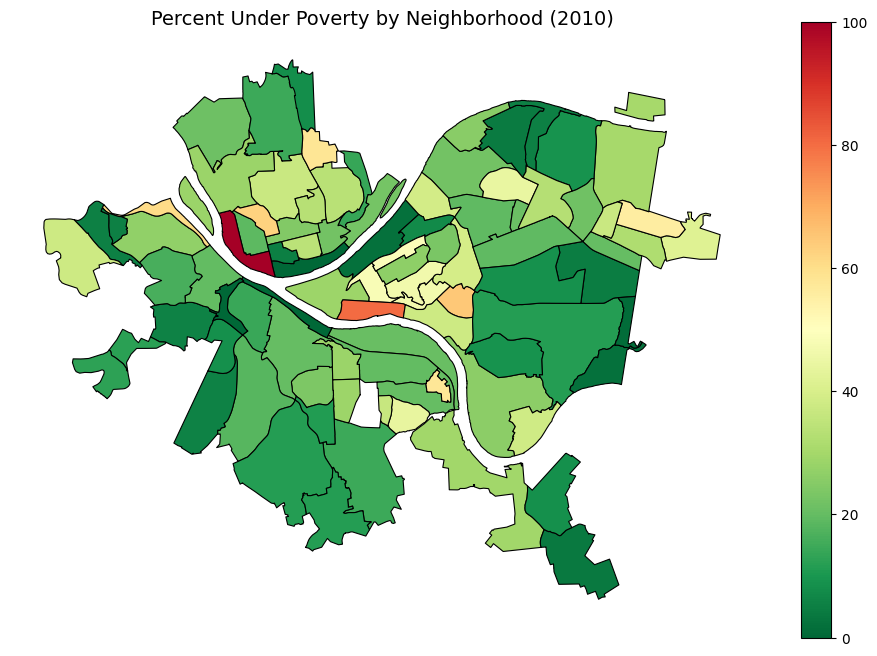

In [17]:
# Create pgh map
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='pct_under_poverty',
            cmap='RdYlGn_r',
            linewidth=0.8,
            edgecolor='black',
            legend=True,
            ax=ax)

plt.title('Percent Under Poverty by Neighborhood (2010)', fontsize=14)
plt.axis('off')
plt.show()